In [187]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix

In [168]:
df = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header=None)
with open('negative.txt') as f:
    negative = f.read().splitlines()
col_names = ['word', 'flag']
neg_text = pd.DataFrame(columns=col_names)
neg_text['flag'] = False

In [169]:
df.info()
neg_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
0    1000 non-null object
1    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 2 columns):
word    0 non-null object
flag    0 non-null bool
dtypes: bool(1), object(1)
memory usage: 0.0+ bytes


In [170]:
df.columns = ['text', 'rating']

In [172]:
for words in negative:
    neg_text[words] = df.text.str.contains(' ' + str(words) + ' ', case=False)
    neg_text['word'] = df['text']
    neg_text['flag'] |= neg_text[words]
    df['rating'] = neg_text['flag']
#
neg_text['allcaps'] = df.text.str.isupper()

In [90]:
#
# Negative comments are identified by the following criteria:
#   - Sentences that contain the following words:
#     - garbled, excessive, waste, wonder, jiggle, problem, useless
#     - doesn't, does not, doesnt, didn't, did not, didnot
#     - couldn't, could not, couldnt
#     - garbage, forget, dies, drawback, broke, bad, disappointment
#     - hate, flaw, avoid, strange, avoid, poor, lacking
#   - When more 2 or more consecutive words are in upper case letters
# Store all the words with negative connatation in a text file

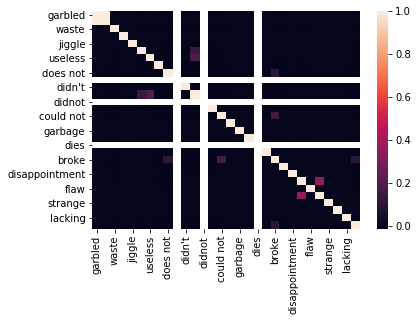

In [147]:
sns.heatmap(neg_text.corr())

In [179]:
target = (neg_text['flag'])
data = neg_text.drop(columns=['word', 'flag'])

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 13


In [188]:
confusion_matrix(target, y_pred)

array([[900,   0],
       [ 13,  87]])

In [191]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=20)
print('With 50% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 50% Holdout: 0.954
Testing on Sample: 0.987


In [193]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=20)

array([0.96, 0.96, 0.96, 0.96, 0.98, 0.98, 0.98, 0.98, 0.96, 1.  , 1.  ,
       1.  , 1.  , 0.98, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])